In [273]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [274]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [275]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [276]:
df_Canada=df[df['country']=='Canada']
df_Canada.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
5,6,Canada,Montreal,Villa,Semi-Furnished,3169,1107368,1985,0,5,...,95520,793316,30,10615,314052,0.05,10,8,2,1
25,26,Canada,Toronto,Villa,Fully-Furnished,1101,386658,1998,1,7,...,60390,255826,20,12145,130832,0.03,2,8,1,0
34,35,Canada,Montreal,Apartment,Semi-Furnished,3094,1078050,1994,6,1,...,62025,603655,10,8270,474395,0.11,4,10,8,0
53,54,Canada,Montreal,Studio,Unfurnished,5010,1751640,1964,4,6,...,96225,760710,30,14515,990930,0.05,5,3,2,0
57,58,Canada,Montreal,Villa,Semi-Furnished,4032,1409429,2002,2,8,...,54630,1049955,15,10080,359474,0.17,10,2,8,1


#### We will remove irrelevant variables and avoid model cheating.

In [277]:
df_Canada=df_Canada.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [278]:
df_Canada.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
5,Canada,Villa,Semi-Furnished,3169,1107368,1985,5,2,1,0
25,Canada,Villa,Fully-Furnished,1101,386658,1998,7,2,0,0
34,Canada,Apartment,Semi-Furnished,3094,1078050,1994,1,1,1,1
53,Canada,Studio,Unfurnished,5010,1751640,1964,6,4,0,0
57,Canada,Villa,Semi-Furnished,4032,1409429,2002,8,2,1,0


In [279]:
df_Canada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15401 entries, 5 to 199989
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15401 non-null  object
 1   property_type       15401 non-null  object
 2   furnishing_status   15401 non-null  object
 3   property_size_sqft  15401 non-null  int64 
 4   price               15401 non-null  int64 
 5   constructed_year    15401 non-null  int64 
 6   rooms               15401 non-null  int64 
 7   bathrooms           15401 non-null  int64 
 8   garage              15401 non-null  int64 
 9   garden              15401 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [280]:
df_Canada.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15401.000000,1.540100e+04,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000
mean,3177.662879,1.112176e+06,1991.527498,4.538082,2.782547,0.504707,0.503344
std,1614.333580,5.650000e+05,18.442819,2.301636,1.855892,0.499994,0.500005
min,400.000000,1.376640e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1781.000000,6.235420e+05,1976.000000,3.000000,1.000000,0.000000,0.000000
50%,3176.000000,1.111270e+06,1992.000000,5.000000,2.000000,1.000000,1.000000
75%,4562.000000,1.597202e+06,2008.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,2.102863e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [281]:
df_Canada.value_counts()

country  property_type      furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Canada   Apartment          Fully-Furnished    411                 148349   2019              8      3          1       0         1
         Townhouse          Fully-Furnished    887                 309151   2007              2      1          1       1         1
                                               429                 153852   2006              5      4          0       1         1
                                               434                 155608   1994              8      8          1       0         1
                                               442                 150394   1971              3      2          0       1         1
                                                                                                                                 ..
         Independent House  Fully-Furnished    605                 212828   2013 

In [282]:
df_Canada.value_counts()

country  property_type      furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Canada   Apartment          Fully-Furnished    411                 148349   2019              8      3          1       0         1
         Townhouse          Fully-Furnished    887                 309151   2007              2      1          1       1         1
                                               429                 153852   2006              5      4          0       1         1
                                               434                 155608   1994              8      8          1       0         1
                                               442                 150394   1971              3      2          0       1         1
                                                                                                                                 ..
         Independent House  Fully-Furnished    605                 212828   2013 

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999987         -0.013612 -0.001929   
price                         0.999987  1.000000         -0.013557 -0.001832   
constructed_year             -0.013612 -0.013557          1.000000 -0.017262   
rooms                        -0.001929 -0.001832         -0.017262  1.000000   
bathrooms                     0.006325  0.006375          0.006639  0.629591   
garage                       -0.004256 -0.004367         -0.005156  0.010410   
garden                        0.001737  0.001770         -0.012606  0.005010   

                    bathrooms    garage    garden  
property_size_sqft   0.006325 -0.004256  0.001737  
price                0.006375 -0.004367  0.001770  
constructed_year     0.006639 -0.005156 -0.012606  
rooms                0.629591  0.010410  0.005010  
bathrooms            1.000000  0.008556 -0.005409  
garage               0.008556  1.000000 -0.0011

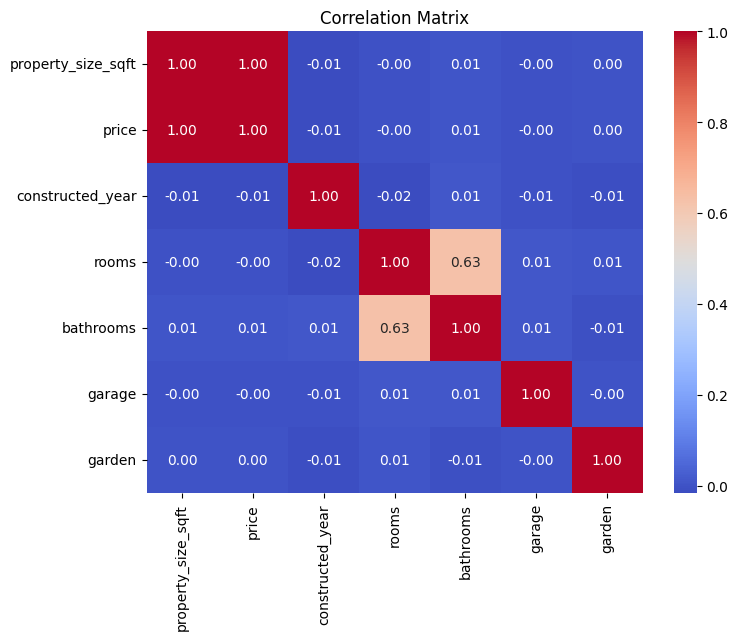

In [283]:
correlation_matrix = df_Canada.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [284]:
df_Canada=pd.get_dummies(df_Canada, columns=['property_type', 'furnishing_status'])
df_Canada.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
5,Canada,3169,1107368,1985,5,2,1,0,False,False,False,False,False,True,False,True,False
25,Canada,1101,386658,1998,7,2,0,0,False,False,False,False,False,True,True,False,False
34,Canada,3094,1078050,1994,1,1,1,1,True,False,False,False,False,False,False,True,False
53,Canada,5010,1751640,1964,6,4,0,0,False,False,False,True,False,False,False,False,True
57,Canada,4032,1409429,2002,8,2,1,0,False,False,False,False,False,True,False,True,False


In [285]:
df_Canada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15401 entries, 5 to 199989
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15401 non-null  object
 1   property_size_sqft                 15401 non-null  int64 
 2   price                              15401 non-null  int64 
 3   constructed_year                   15401 non-null  int64 
 4   rooms                              15401 non-null  int64 
 5   bathrooms                          15401 non-null  int64 
 6   garage                             15401 non-null  int64 
 7   garden                             15401 non-null  int64 
 8   property_type_Apartment            15401 non-null  bool  
 9   property_type_Farmhouse            15401 non-null  bool  
 10  property_type_Independent House    15401 non-null  bool  
 11  property_type_Studio               15401 non-null  bool  
 12  property

In [286]:
X=df_Canada.drop(['price', 'country'], axis=1)
y=df_Canada['price']

In [287]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [288]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999734420836417
Linier Regresion RMSE :  2908.1746633359585


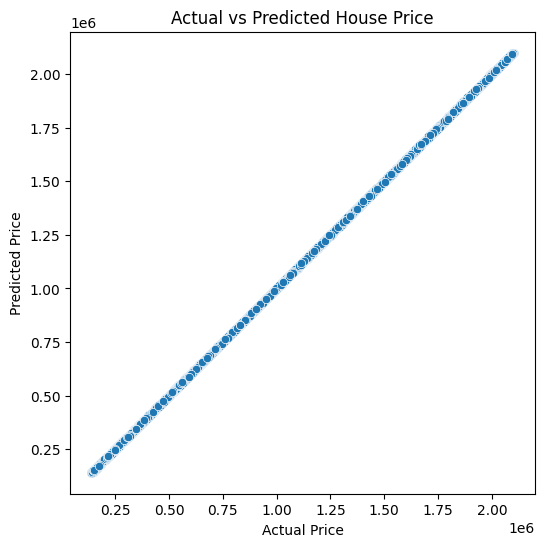

In [289]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [290]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree   R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree n RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree   R² :  0.9999432761710149
Decision Tree n RMSE :  4250.169560373815


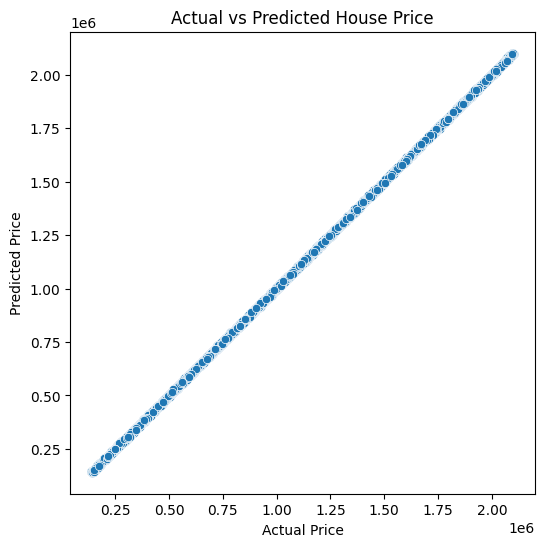

In [291]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [292]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999679489265083
Random Forest RMSE :  4250.169560373815


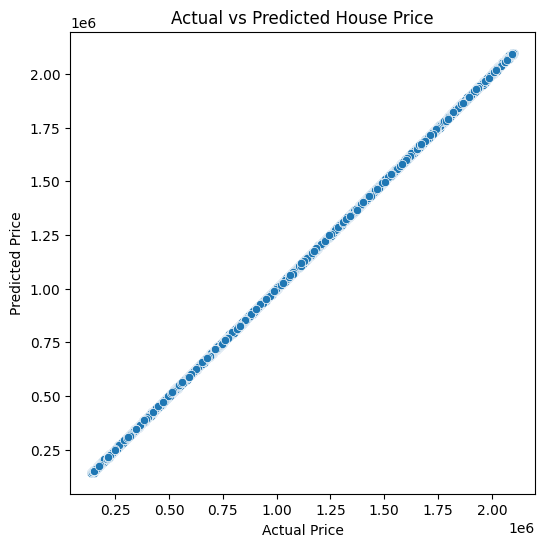

In [293]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [294]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost R² :  0.9999235398410672
Gradient Boost RMSE :  4250.169560373815


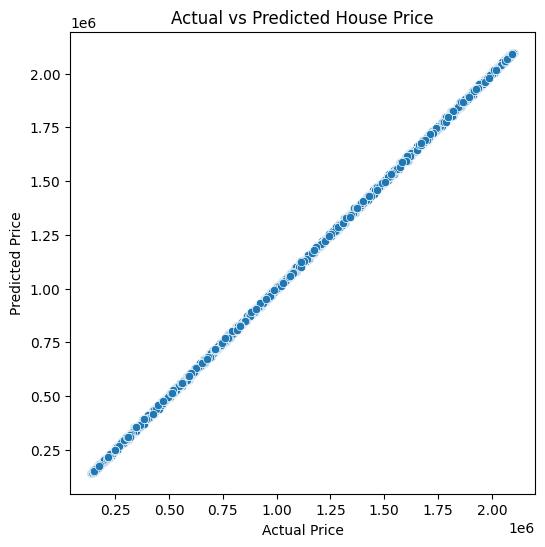

In [295]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [296]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [297]:
result

,metode,R²,RMSE
0,lr,0.999973,2908.174663
1,dt,0.999943,4250.169560
2,rf,0.999968,3194.808101
3,gb,0.999924,4934.476503
